# Band Structure for free electrons in a square lattice

Band structure refers to the mapping of electron dispersion in k-space. Electron dispersion refers to the energy that an electron can have at a certain value of k.

For free electrons the dispersion relation is given by

$E = \frac{\hbar^2}{2 m_e} (\textbf{k} - \textbf{G})^2$

where $\textbf{G}$ is a reciprocal lattice vector.

We can see that for a given reciprocal lattice vector, the dispersion is quadratic. Therefore when considering a range of reciprocal lattice vectors, we will have a band structure of overlapping quadratics.

In this notebook, we will consider $\textbf{G} = (G_x, G_y)$ such that $|G_x|, |G_y| \leq 2 * \frac{2\pi}{a}$, where $a$ is the lattice parameter

### Libraries 📚👇

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

In [2]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi/a'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

### Surface plot of the bands

Define region of k-space to plot, as well as the reciprocal lattice vectors, $G$ to consider.

In [3]:
n = 101
kx = np.linspace(-np.pi, np.pi, n)
ky = np.linspace(-np.pi, np.pi, n)
X, Y = np.meshgrid(kx, ky)
Gs = np.array([(0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]) * 2 * np.pi

Define a function to calculate the dispersion for a single $G$. We ignore the prefactor $\frac{\hbar^2}{2 m_e}$ and divide the result by $2\pi^2$ in order to end up with an energy with units of $\frac{\hbar^2 \pi^2}{m_e a^2}$

In [4]:
def get_energy(kx, ky, Gx, Gy):
    return ((kx - Gx) ** 2 + (ky - Gy) ** 2) * (1 / (2 * (np.pi) ** 2))

Plot the surfaces for a range of $G$

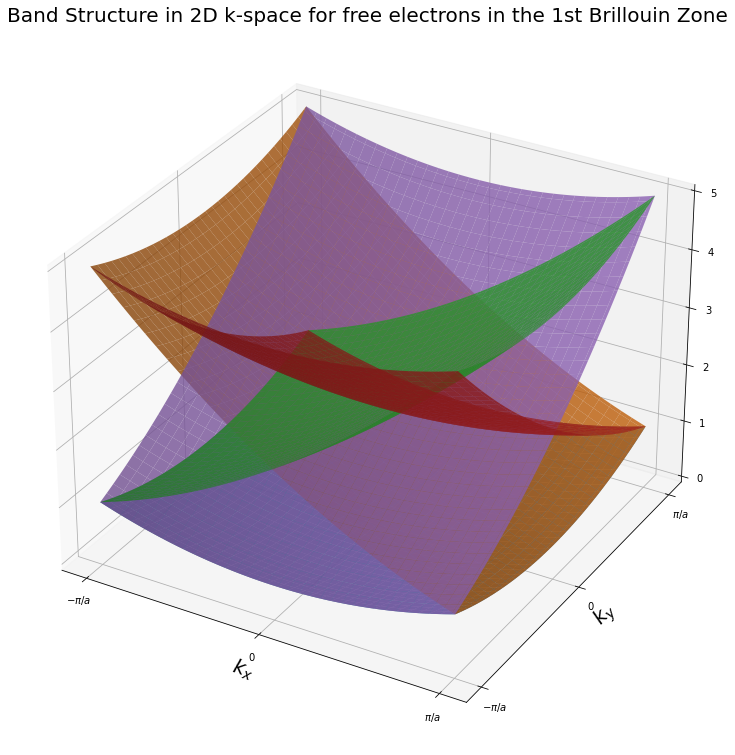

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(auto_add_to_figure=False, fig=fig)
fig.add_axes(ax)

for Gx, Gy in Gs:
    zs = np.array(get_energy(np.ravel(X), np.ravel(Y), Gx, Gy))
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, alpha=0.8)

ax.set_xlabel(r"$k_x$", fontsize=20)
ax.set_ylabel(r"$k_y$", fontsize=20)
ax.set_title("Band Structure in 2D k-space for free electrons in the 1st Brillouin Zone" , fontsize=20)

# unit of pi on axes
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.show()

### Band-Structure for the path $\Gamma - M - X - \Gamma$

Now we will find the band structure for the above specified path that passes through high symmetry points. See the below diagram for labelling of the high symmetry points.

![title](square_lattice_bz.PNG)

Define a larger range of $G$ in order not to miss any important bands

In [6]:
G_range = [-2, -1, 0, 1, 2]
Gs = np.array(list(product(G_range, repeat=2))) * 2 * np.pi

Define a helper function to generate the coordinates of the path segments that we will follow.

In [7]:
def generate_k(kx_start, kx_end, ky_start, ky_end):
    kx = np.linspace(kx_start, kx_end, 101)
    ky = np.linspace(ky_start, ky_end, 101)
    k = np.sqrt(kx**2 + ky**2)

    return kx, ky, k

For each path segment, for each $G$ calculate the energy band.

In [23]:
def get_segment_energies(kx, ky, Gs):
    E_out = []
    for Gx, Gy in Gs:
        E = get_energy(kx, ky, Gx, Gy)
        E_out.append(E)
        
    E_out = np.array(E_out)
    
    return E_out

Generate the values of $k_x$, $k_y$ and $|k|$ along each path segment, and then calculate the energy bands.

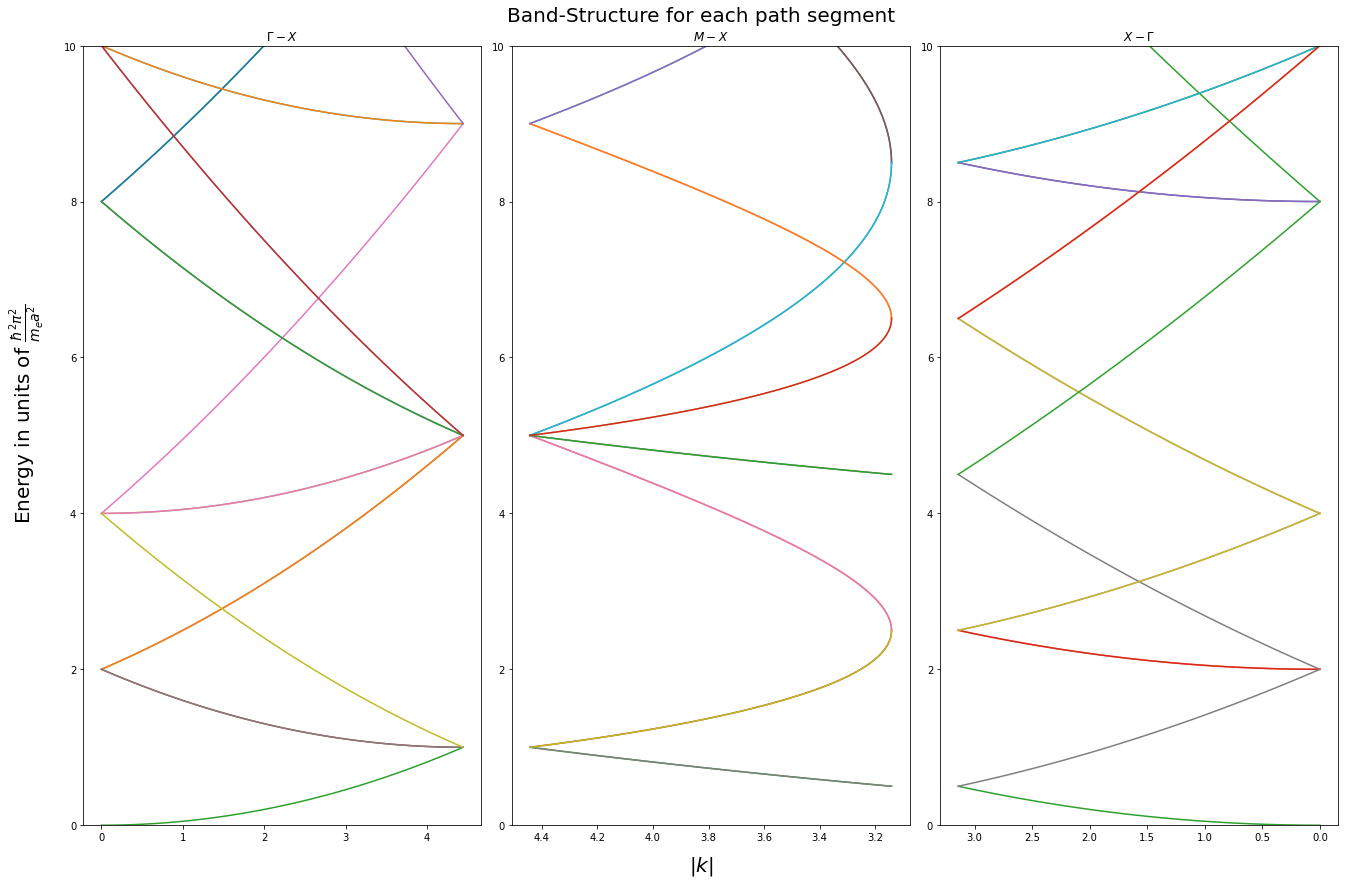

In [39]:
G_M_kx, G_M_ky, G_M_k = generate_k(0, np.pi, 0, np.pi)
M_X_kx, M_X_ky, M_X_k = generate_k(np.pi, np.pi, np.pi, 0)
X_G_kx, X_G_ky, X_G_k = generate_k(np.pi, 0, 0, 0)

E_G_M = get_segment_energies(G_M_kx, G_M_ky, Gs)
E_M_X = get_segment_energies(M_X_kx, M_X_ky, Gs)
E_X_G = get_segment_energies(X_G_kx, X_G_ky, Gs)

fig, axes = plt.subplots(1, 3, figsize=(18, 12))

for i in range(E_G_M.shape[0]):
    axes[0].plot(G_M_k, E_G_M[i])
    axes[1].plot(M_X_k, E_M_X[i])
    axes[2].plot(X_G_k, E_X_G[i])

axes[0].set_title(r"$\Gamma - X$")
axes[1].set_title(r"$M - X$")
axes[2].set_title(r"$X - \Gamma$")
axes[1].invert_xaxis()
axes[2].invert_xaxis()

fig.text(0.5, -0.02, r"$|k|$", ha='center', fontsize=20)
fig.text(-0.02, 0.4, r"Energy in units of $\frac{\hbar^2 \pi^2}{m_e a^2}$", ha='center', fontsize=20, rotation=90)

plt.setp(axes, ylim=(0, 10))
plt.suptitle("Band-Structure for each path segment", fontsize=20)
plt.tight_layout()


### Band structure for overall path

Now we have to combine the above plots to represent the band energies of the overall path. Our x axis will no longer represent $|k|$, but will instead indicate distance travelled along the path.

And so we start by adjusting the x-axis values for the 2nd and 3rd segments, leaving the calculated energies untouched.

In [41]:
new_min = np.sqrt(2) * np.pi
new_max = new_min + np.pi
M_X_k_adj = np.linspace(new_min, new_max, 101)
X_G_k_adj = np.flip(X_G_k) + np.max(M_X_k_adj)

Now plot the overall bands

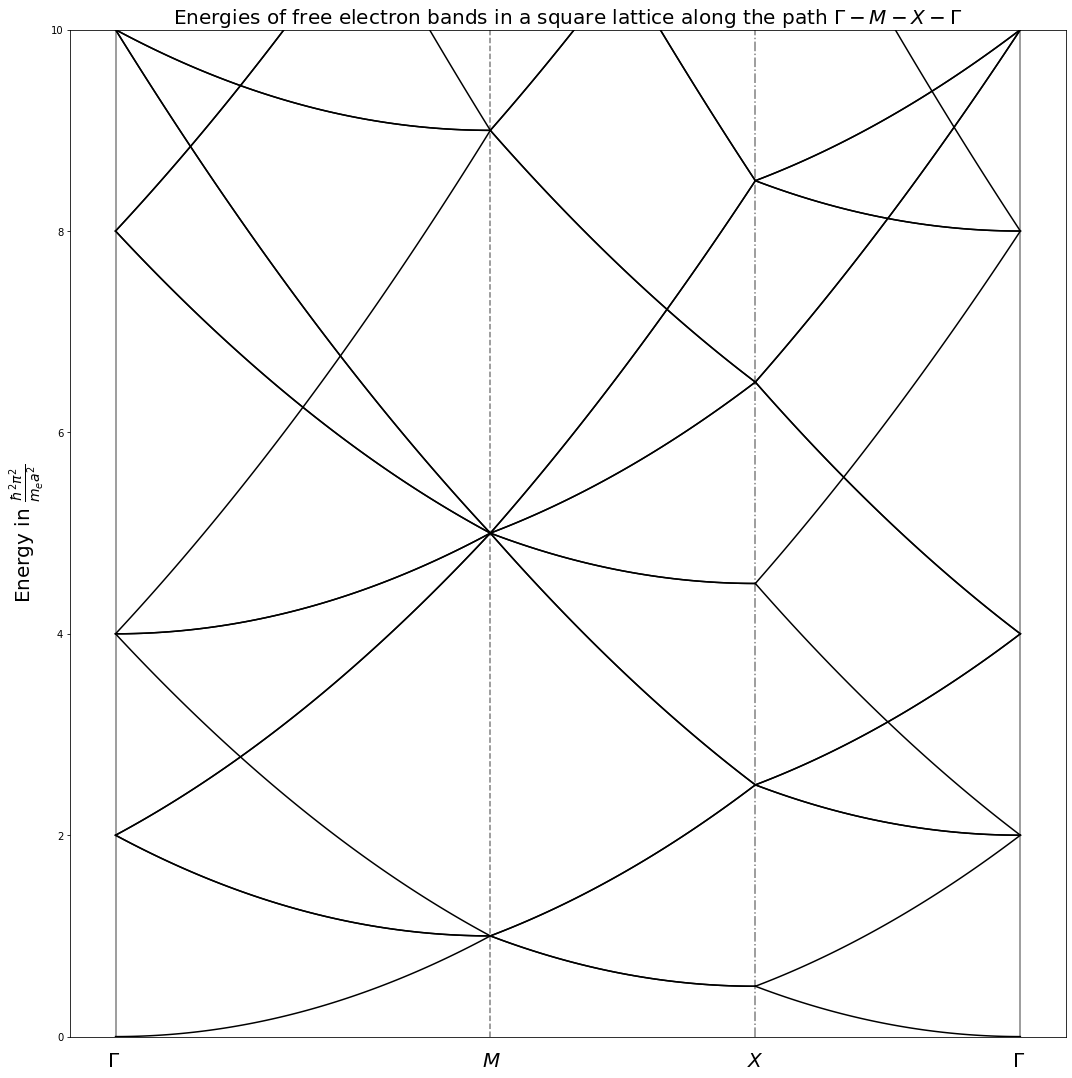

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))

for i in range(E_G_M.shape[0]):
    plt.plot(G_M_k, E_G_M[i], c='black')
    plt.plot(M_X_k_adj, E_M_X[i], c='black')
    plt.plot(X_G_k_adj, E_X_G[i], c='black')

ax.set_ylim([0, 10])
ax.get_xaxis().set_visible(False)

plt.vlines(x=0, ymin=0, ymax=10, colors='grey', linestyles='solid')
plt.vlines(x=np.sqrt(2) * np.pi, ymin=0, ymax=10, colors='grey', linestyles='dashed')
plt.vlines(x=(np.sqrt(2) + 1) * np.pi, ymin=0, ymax=10, colors='grey', linestyles='dashdot')
plt.vlines(x=(np.sqrt(2) + 2) * np.pi, ymin=0, ymax=10, colors='grey', linestyles='solid')

plt.text(-0.1, -0.3,r"$\Gamma$", fontsize=20)
plt.text(np.sqrt(2) * np.pi - 0.1, -0.3,r"$M$", fontsize=20)
plt.text((np.sqrt(2) + 1) * np.pi - 0.1, -0.3,r"$X$", fontsize=20)
plt.text((np.sqrt(2) + 2) * np.pi - 0.1, -0.3,r"$\Gamma$", fontsize=20)

plt.ylabel(r"Energy in $\frac{\hbar^2 \pi^2}{m_e a^2}$", fontsize=20)
plt.title(r"Energies of free electron bands in a square lattice along the path $\Gamma - M - X - \Gamma$", fontsize=(20))

plt.tight_layout()
plt.show()

### Conclusion

Finally, we achieved what we desired: to replicate the typical diagram used to show band structure for the case of free electrons in a square lattice.

The free electron model is the simplest approach to calculating band structures. It can be unreasonably effective in approximating real band structures in some materials, but fails miserably in others. Better approaches include the nearly-free electron model, the tight-binding model and more recently, density functional theory (DFT).